In [5]:
pip install sympy

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 10.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 7.7 MB/s eta 0:00:00ta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from sympy import symbols

In [64]:
# Part (a)

#Define a Python function that implements the above albedo formula. Your function should take the temperature as input and return the correct albedo 

def albedo_function(T):
    alpha_o = 0.289 #is the albedo of warm, ice-free environment  
    alpha_i = 0.7 #is the albedo of a very cold, completely ice-covered planet 
    temp_o = 293 #is the threshold temperature above which we assume the planet is ice-free
    temp_i = 260 # is the threshold temperature below which we assume the planet is completely ice covered.
    if T <= temp_i:
        return alpha_i
    elif temp_i < T < temp_o:
        return alpha_o + (alpha_i - alpha_o) * ((T - temp_o) ** 2) / ((temp_i - temp_o) ** 2)
    else:
        return alpha_o

# Use your function to calculate albedos for a wide range on planetary temperature
print(albedo(250)) 
print(albedo(285)) 
print(albedo(300)) 

TypeError: 'float' object is not callable

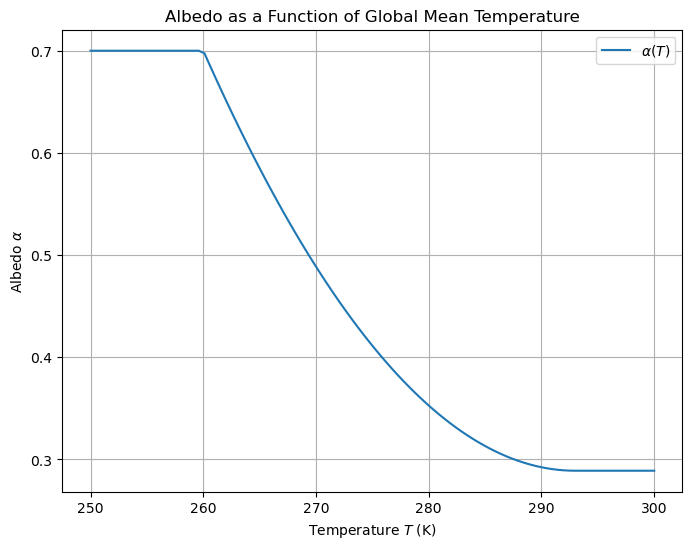

In [29]:
temperatures = np.linspace(250, 300, 100)
albedos = [albedo(T) for T in temperatures]
plt.figure(figsize=(8, 6))
plt.plot(temperatures, albedos, label=r'$\alpha(T)$')
plt.xlabel(r'Temperature $T$ (K)')
plt.ylabel(r'Albedo $\alpha$')
plt.title('Albedo as a Function of Global Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Part (b)

# calculate the new equilibrium surface temperature. How much is the total warming now? (recall in class it was 1 degC)

solarconstant = 1366 
albedo = 0.3
stefanboltzman = 5.670374419e-8 
epsilon = 0.80  
M = 2 
heat_C = 1e8 

def myfunc(t, u):
    current_albedo = albedo_function(u[1])
    f = np.zeros(M)
    f[0] = (solarconstant * (1 - current_albedo) / 4  - epsilon * stefanboltzman * (u[0]**4) - (1 - epsilon) * stefanboltzman * (u[1]**4)) / heat_C
    f[1] = (solarconstant * (1 - current_albedo) / 4  + epsilon * stefanboltzman * (u[0]**4) - stefanboltzman * (u[1]**4)) / heat_C
    return f

def calculate_equilibrium_temperature():
    u0 = np.array([290, 290])
    dt = 60*60*365*24
    t0 = 0
    tmax = 100*dt
    t = np.arange(t0, tmax, dt)
    sol = solve_ivp(myfunc, [t0, tmax], u0, method='RK45', t_eval=t)
    final_temperature = sol.y[0][-1]
    return final_temperature 
    equilibrium_temperature = calculate_equilibrium_temperature()

In [90]:
equilibrium_temperature = calculate_equilibrium_temperature()

In [93]:
print("Equilibrium surface temperature:", equilibrium_temperature, "K")

Equilibrium surface temperature: 196.9888066181321 K
